# Introduction au traitement des images

Ce premier notebook permet de s'initier au chargement, la manipulation et la visualisation des images. Dans un premier temps, une image couleur est chargée. Son contenu est vérifié, l'image est affichée. Puis l'image est transformée en niveaux de gris  suivant plusieurs méthodes simples.

## Objectifs

Après ce premier notebook, vous saurez:

* Charger et visualiser une image.
* Extraire un canal d'une image couleur.
* Transformer l'image en noir et blanc.

## Images

Vous pouvez trouver d'autres images dans le module scikit-image. Voir la page [skimage.data](https://scikit-image.org/docs/stable/api/skimage.data.html).

In [3]:
# chargement des modules python
%matplotlib inline
import skimage
import skimage.io
import numpy as np
import matplotlib.pyplot as plt

## Chargement d'une image depuis le disque

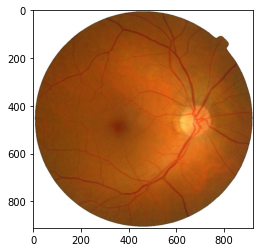

In [4]:
retine = skimage.io.imread("https://github.com/srivol/visionindus/raw/master/retine.png")
plt.imshow(retine, cmap=plt.cm.gray)
plt.show()

## Chargement d'une image depuis scikit-image.org

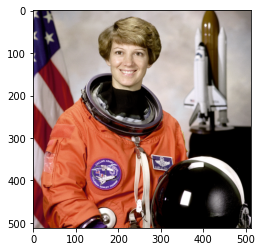

In [3]:
astronaut = skimage.data.astronaut()
plt.imshow(astronaut)
plt.show()

## Manipulation d'une image en couleurs

Une image couleur est représentée en mémoire par un tableau de nombres à 3 dimensions. Nous allons tester le chargement d'une image en couleur.

In [4]:
# L'image contient 911 par 922 pixels, chaque pixel étant représenté par 3 informations: Rouge, Vert, Bleu, 
# à la manière de l'oeil humain
print(astronaut.shape)
print(astronaut.dtype)

(512, 512, 3)
uint8


### Affichage séparé des 3 canaux de couleurs

Les 3 informations composant les couleurs de l'image sont affichées séparément. Attention, la notion de couleur dans ce contexte n'a pas de sens, c'est pourquoi seules des intensités (en niveaux de gris) sont représentées.

On peut remarquer que:
*  le canal vert présente le meilleur contraste
*  le canal vert présente la meilleure netteté

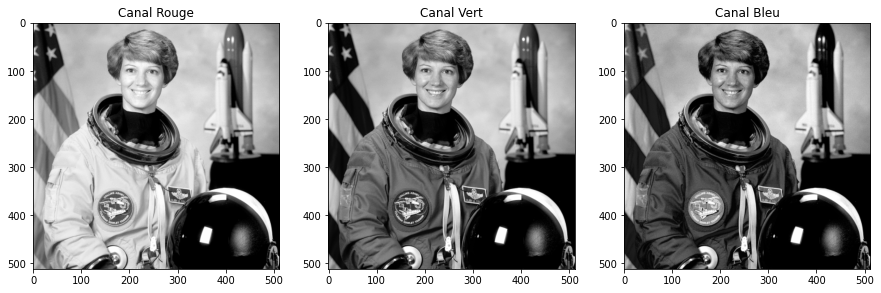

In [5]:
R = astronaut[:,:,0]  # image à niveaux de gris, canal rouge
V = astronaut[:,:,1]  # image à niveaux de gris, canal vert
B = astronaut[:,:,2]  # image à niveaux de gris, canal bleu

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(R, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title('Canal Rouge')
plt.subplot(132)
plt.imshow(V, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title('Canal Vert')
plt.subplot(133)
plt.imshow(B, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title('Canal Bleu')
plt.show()

### Transformer une image couleur en image noir et blanc

Nous allons ensemble la transformer en photographie noir et blanc. Utiliser l'image du chat 'chelsea' de skimage.

1. De la même manière que pour l'image précédente, prendre le canal vert de l'image.

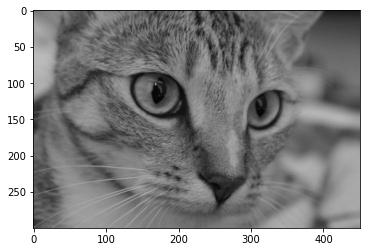

In [6]:
P = skimage.data.chelsea()
V = P[:,:,1]
plt.imshow(V, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

2. Il existe beaucoup d'autres manières de transformer son image en noir et blanc. Par exemple, prenons la moyenne des 3 canaux:

$$G = \frac{R+V+B}{3}$$

Ce résultat vous semble-t-il meilleur?


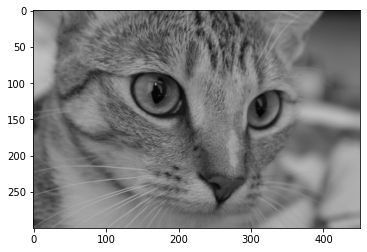

In [8]:
# Attention, il faut manipuler des variables flottantes, sinon le calcul 'dépasse' des bornes
P = P.astype(np.float64)
V = P[:,:,1]
R = P[:,:,0]
B = P[:,:,2]
G = (R+V+B)/3
plt.imshow(G, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

3. Une autre formule est donnée par la formule de mixage des canaux, donnant la luminance:
$$L=0.2126\times R + 0.7152\times V+0.0772\times B$$

Notez que la somme des coefficients vaut 1.

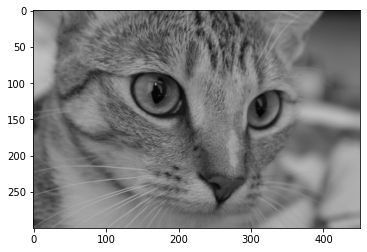

In [9]:
L = 0.2126*R+0.7152*V+0.0772*B
plt.imshow(G, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

# Conclusion

La transformation d'une image en n&b est relativement simple. Si l'on n'a que peu de temps, il est facile de ne conserver que le canal vert. Si l'on veut accentuer certains éléments de la scène, il est possible de jouer sur les coefficients du mixage des canaux